##  Module 1 Exercises

The exercises in the notebook are similar to what has been discussed in lab and practice notebooks. 

**Activity 1:** Read the NYC_death_causes data from **`/dsa/data/all_datasets/NYC_death_causes`** into variable called NYC_death_causes.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set_style('whitegrid')
import json

with open('/dsa/data/all_datasets/NYC_death_causes', 'r', encoding='utf-8') as f:
    NYC_death_causes=json.load(f)

**Activity 2:** Normalize the json formatted data in NYC_death_causes and save the result to NYC_data variable.

In [2]:
import pandas as pd
from pandas.io.json import json_normalize

NYC_data = json_normalize(NYC_death_causes,'data')
NYC_data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1095,EB649B90-D468-4471-A55B-8B66572E31F8,1095,1484932698,399231,1484932698,399231,None,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,.,.
1,1096,47B92A6A-2EB4-48B3-A7F4-0AF00EBE4105,1096,1484932698,399231,1484932698,399231,None,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2
2,1097,FC47920F-22D9-415D-A4C2-463D3F8C918F,1097,1484932698,399231,1484932698,399231,None,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,.,.
3,1098,3CF03BB4-BB37-4E6D-9E41-F7C36EDAD1FB,1098,1484932698,399231,1484932698,399231,None,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5
4,1099,EE1E1741-4019-46A3-BEDC-6EC23ED4CAB3,1099,1484932698,399231,1484932698,399231,None,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3


**Activity 3:** Extract names of columns from the tags "meta/view/columns/" and save them in a list called names. Exclude the names from list which start with a ':' in the begining. 

In [3]:
names=[]
length=len(NYC_death_causes["meta"]["view"]["columns"])
for i in range(0, length):
    names.append(NYC_death_causes["meta"]["view"]["columns"][i]["fieldName"])

names=[word for word in names if not ':' in word]
names


['year',
 'leading_cause',
 'sex',
 'race_ethnicity',
 'deaths',
 'death_rate',
 'age_adjusted_death_rate']

**Activity 4:** Drop the columns 0 through 7 from NYC_data and assign the result back to NYC_data.

In [4]:
NYC_data.drop(NYC_data.columns[[0,1,2,3,4,5,6,7]], inplace=True, axis=1)
NYC_data.head()


,8,9,10,11,12,13,14
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,.,.
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2
2,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,.,.
3,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5
4,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3


**Activity 5:** Rename the columns with the extracted names to replace the default numbered column names.

In [5]:
NYC_data.columns = names
NYC_data.head()

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,.,.
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2
2,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,.,.
3,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5
4,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3


**Activity 6:** Draw a countplot for the number of NaN values in each row. This is similar to what is done in the lab.

In [6]:
NYC_data['num_of_null'] = NYC_data.isnull().sum(axis=1)
NYC_data.head()

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate,num_of_null
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,.,.,0
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2,0
2,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,.,.,0
3,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5,0
4,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3,0


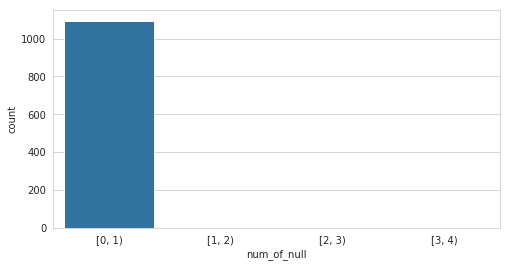

In [7]:
# Forms bins to plot a count plot 
bins = [0,1,2,3,4]

# make bins of data in num_of_null using pandas.cut() function. The bin ranges are specified in bins variable.  
cut = pd.cut(NYC_data.num_of_null, bins=bins, include_lowest=True, right=False)
fig, axis1 = plt.subplots(1,figsize=(8,4))
sns.countplot(x=cut, data=cut.to_frame(), ax=axis1)


**Activity 7:** Replace ".." present in rows with a valid NAN and re draw the above plot. 

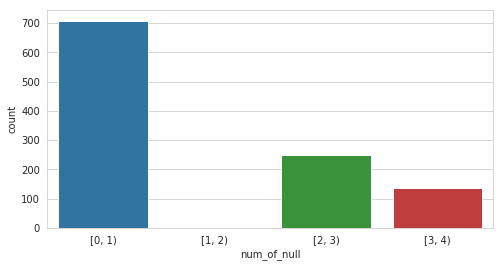

In [8]:
# replace '.' to NaN
NYC_data.replace('.',np.NaN,inplace=True)
NYC_data['num_of_null'] = NYC_data.isnull().sum(axis=1)

# make bins of data in num_of_null using pandas.cut() function. The bin ranges are specified in bins variable.  
cut = pd.cut(NYC_data.num_of_null, bins=bins, include_lowest=True, right=False)
fig, axis1 = plt.subplots(1,figsize=(8,4))
sns.countplot(x=cut, data=cut.to_frame(), ax=axis1)


**Activity 8:** Fill the NAN values in the dataset using median values of columns. Make sure to have the column names right. 

In [9]:
data = NYC_data.iloc[:,4:7]
NYC_data.iloc[:,4:7] = data.fillna(data.median())

In [10]:
NYC_data.head()

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate,num_of_null
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,18.35,20.35,2
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2,0
2,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,18.35,20.35,2
3,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5,0
4,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3,0


In [11]:
# change data type from object to float in columns: deaths, death_rate, age_adjusted_death_rate
NYC_data["deaths"] = NYC_data.deaths.astype(float)
NYC_data["death_rate"] = NYC_data.death_rate.astype(float)
NYC_data["age_adjusted_death_rate"] = NYC_data.age_adjusted_death_rate.astype(float)
NYC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 8 columns):
year                       1094 non-null object
leading_cause              1094 non-null object
sex                        1094 non-null object
race_ethnicity             1094 non-null object
deaths                     1094 non-null float64
death_rate                 1094 non-null float64
age_adjusted_death_rate    1094 non-null float64
num_of_null                1094 non-null int64
dtypes: float64(3), int64(1), object(4)
memory usage: 68.5+ KB


**Activity 9:** Find all rows where number of deaths are greater than 3 standard deviations from average and store this into a new data frame. 

In [12]:
from scipy import stats
outliers = NYC_data[(np.abs(stats.zscore(NYC_data[["deaths"]])) > 3).all(axis=1)]
outliers.head()

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate,num_of_null
61,2010,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3408.0,254.1,216.6,0
79,2007,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3356.0,250.9,213.7,0
119,2010,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,White Non-Hispanic,5351.0,374.2,189.2,0
190,2009,Malignant Neoplasms (Cancer: C00-C97),F,White Non-Hispanic,3346.0,232.9,159.0,0
195,2011,Malignant Neoplasms (Cancer: C00-C97),F,White Non-Hispanic,3371.0,238.0,161.1,0


**Activity 10:** Draw a scatter plot between the columns deaths and death rate for your reduced data frame from Activity 9. 
Use "leading_cause" as the color label for points. 
Explain the graph briefly in below markdown cell. 

`Hint`: Use [seaborn library](https://seaborn.pydata.org/index.html) or [MatplotLib](https://matplotlib.org/)

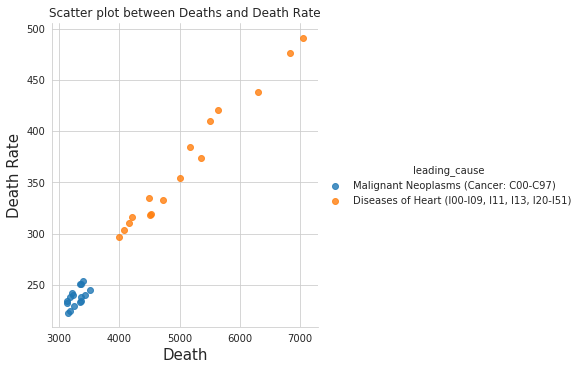

In [13]:
#plot data with seaborn

facet = sns.lmplot(data=outliers, x='deaths', y='death_rate', hue='leading_cause', 
                   fit_reg=False, legend=True, legend_out=True)
plt.xlabel('Death',fontsize=15)
plt.ylabel('Death Rate',fontsize=15)
plt.title('Scatter plot between Deaths and Death Rate')
plt.show()

**Activity 11:** Draw a histogram for deaths by year.

`Hint`: Explore pandas dataframe visualization functions

**Reference:** [pandas visualizations](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html)

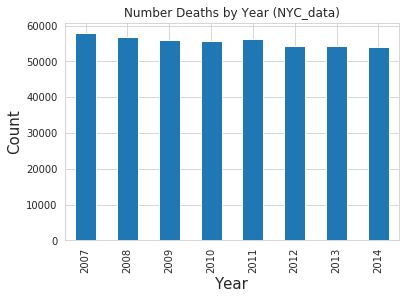

In [14]:
# plot shows deaths by year using NYC_data
a = NYC_data.groupby(['year'])[["deaths"]].sum()
a.plot.bar(legend=False)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Number Deaths by Year (NYC_data)')
plt.show()

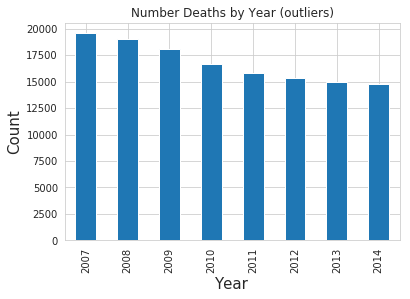

In [15]:
# plot shows deaths by year using outliers
b = outliers.groupby(['year'])[["deaths"]].sum()
b.plot.bar(legend=False)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Number Deaths by Year (outliers)')
plt.show()

**Activity 12:** Draw a box plot for deaths by year again. Give your thoughts on the plot in below markdown cell. 

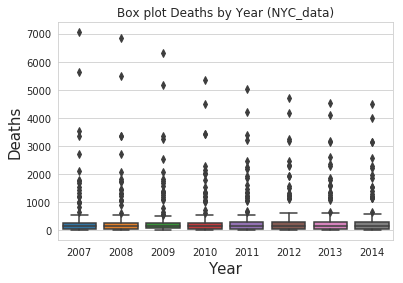

In [16]:
# boxplot using NYC_data
boxplot = sns.boxplot(x="year", y="deaths", data=NYC_data)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Deaths',fontsize=15)
plt.title('Box plot Deaths by Year (NYC_data)')
plt.show()